# Data preprocessing

In [31]:
import pandas as pd

data= pd.read_csv('HR_data.csv')

features = ['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']
X = data[features]
y = data['Frustrated']

df = pd.concat([X, y], axis=1)
df

means = X.mean()
stds = X.std()

# Standardize the features
X_standardized = (X - means) / stds

# Combine the standardized features with the target variable
df_Standardized = pd.concat([X_standardized, y.reset_index(drop=True)], axis=1)

# Rename the 'Frustrated' column to 'Frustration_Level'
df_Standardized.rename(columns={'Frustrated': 'Frustration_Level'}, inplace=True)

# Map the values in 'Frustration_Level' to the specified categories
df_Standardized['Frustration_Level'] = df_Standardized['Frustration_Level'].map(
    lambda x: 0 if x in [0, 1] else 1 if x in [2, 3, 4] else 2
)
y = df_Standardized['Frustration_Level']
df_Standardized

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Frustration_Level
0,0.260749,0.392342,-0.631771,0.824668,-0.445924,-0.131939,0
1,-0.670301,-0.524777,-0.825667,-0.042982,-0.849385,-0.409001,2
2,-0.351575,-0.180394,-0.651859,0.064942,-0.692701,-0.487928,0
3,0.387612,0.377530,-0.465551,0.695444,-0.324494,0.518262,0
4,0.175036,-0.033507,0.001493,0.439835,0.085234,0.137066,2
...,...,...,...,...,...,...,...
163,-0.321902,-0.301360,0.804569,-1.419009,0.350030,-0.533643,2
164,-2.422157,-2.554041,0.177024,-2.052351,-1.169020,-1.831071,0
165,-1.569319,-1.188238,-0.574603,-1.200322,-1.287316,-1.311424,0
166,-0.689868,-0.540823,-0.855363,-0.109724,-1.017820,-0.737003,1


#### Checking for number of observations in each class

In [32]:
number_of_observations_in_each_class = df_Standardized['Frustration_Level'].value_counts().sort_index()
number_of_observations_in_each_class

Frustration_Level
0    74
1    70
2    24
Name: count, dtype: int64

# Feature selection

## Correlation analysis

In [33]:
df_Standardized.corr().round(2)

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Frustration_Level
HR_Mean,1.00,0.95,0.19,0.76,0.63,0.65,0.10
HR_Median,0.95,1.00,-0.04,0.80,0.42,0.59,0.09
HR_std,0.19,-0.04,1.00,-0.36,0.84,0.20,0.08
HR_Min,0.76,0.80,-0.36,1.00,0.15,0.42,0.00
HR_Max,0.63,0.42,0.84,0.15,1.00,0.47,0.09
HR_AUC,0.65,0.59,0.20,0.42,0.47,1.00,0.07
Frustration_Level,0.10,0.09,0.08,0.00,0.09,0.07,1.00


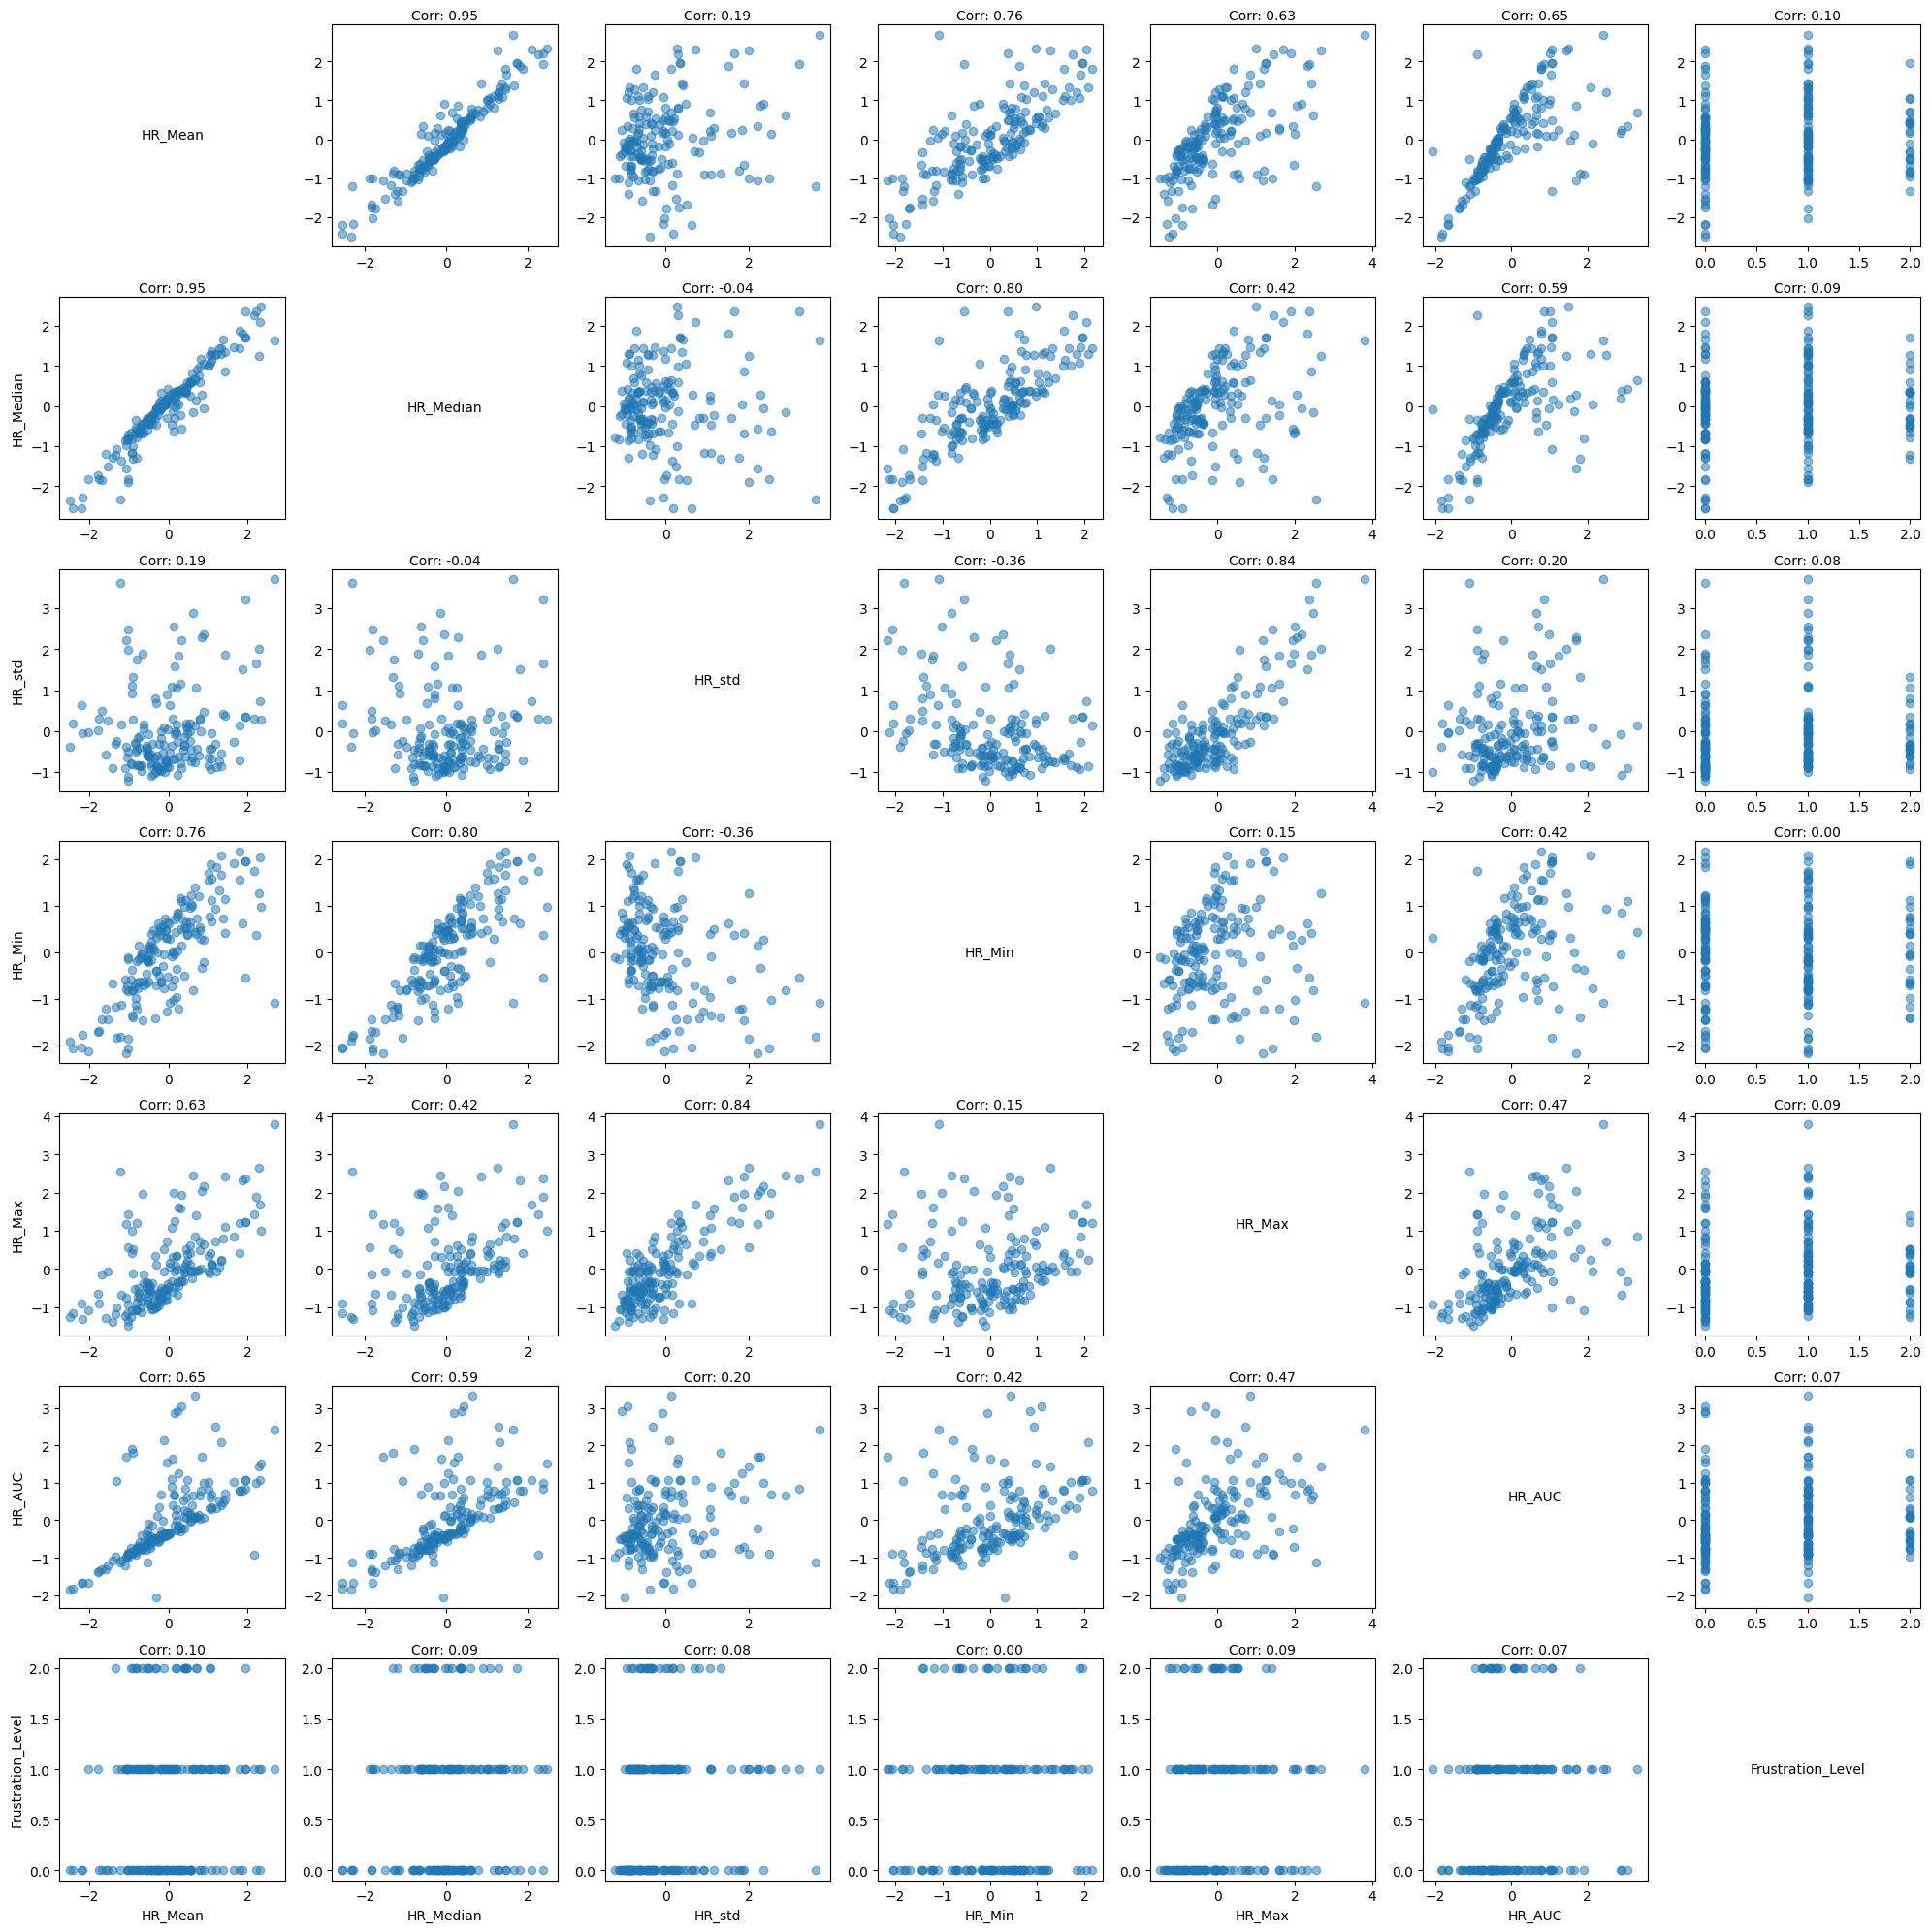

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Number of columns
num_vars = len(df_Standardized.columns)

# Create figure and axes
fig, axes = plt.subplots(num_vars, num_vars, figsize=(20, 20), dpi=100)

# Loop through each pair of columns
for i in range(num_vars):
    for j in range(num_vars):
        ax = axes[i, j]
        if i != j:
            ax.scatter(df_Standardized.iloc[:, j], df_Standardized.iloc[:, i], alpha=0.5)
            corr_coeff = np.corrcoef(df_Standardized.iloc[:, j], df_Standardized.iloc[:, i])[0, 1]
            ax.text(0.5, 1.07, f"Corr: {corr_coeff:.2f}", ha='center', va='top', transform=ax.transAxes)
            if j == 0:
                ax.set_ylabel(df_Standardized.columns[i])
            if i == num_vars - 1:
                ax.set_xlabel(df_Standardized.columns[j])
        else:
            ax.text(0.5, 0.5, df_Standardized.columns[i], ha='center', va='center', fontsize=10, color='black')
            ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

feature_importances = clf.feature_importances_

importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importances_df


,Feature,Importance
2,HR_std,0.190274
3,HR_Min,0.175175
5,HR_AUC,0.165550
4,HR_Max,0.162179
0,HR_Mean,0.153944
1,HR_Median,0.152878


# Predictive models

## Baseline

In [36]:
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter


# Determine the most frequent class in the entire dataset
most_frequent_class = Counter(y).most_common(1)[0][0]

# Predict the most frequent class for the entire dataset
y_pred = [most_frequent_class] * len(y)

# Calculate accuracy
accuracy_baseline = accuracy_score(y, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy_baseline}')

# Convert lists to numpy arrays
baseline_predicted_labels = np.array(y_pred)
all_correct_labels = np.array(y)

# Print arrays with predicted and correct class labels
print('Baseline Predicted Class Labels:', baseline_predicted_labels)
print('Correct Class Labels:', all_correct_labels)

Accuracy: 0.44047619047619047
Baseline Predicted Class Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Correct Class Labels: [0 2 0 0 2 0 0 1 0 1 0 0 1 1 0 1 2 0 0 2 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 2 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 2 2 1 1 2 2 0 2 2 0 1 2 0 1 2
 1 2 2 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 2 1 1 2 0 0 2 0 1 2 1 0 1 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 2 0 0 2 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 2 0 1 2 0 0 1 0]


## Data splitting

In [37]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

## DT

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize lists to store accuracies, predicted labels, and correct labels for each fold
kf_accuracies_dt = []
DT_predicted_labels = []
all_correct_labels = []

# Perform Stratified K-Fold Cross-Validation
for train_index, val_index in skf.split(X, y):
    
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]
    
    # Initialize and train the Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=5, random_state=0)
    clf.fit(X_train_kf, y_train_kf)
    
    # Predict the validation fold
    y_pred_kf = clf.predict(X_val_kf)
    
    # Store predicted and correct labels
    DT_predicted_labels.extend(y_pred_kf)
    all_correct_labels.extend(y_val_kf)
    
    # Calculate accuracy
    kf_accuracies_dt.append(accuracy_score(y_val_kf, y_pred_kf))

# Print Stratified K-Fold CV accuracies
print(f'Stratified K-Fold CV Accuracies: {kf_accuracies_dt}')
print(f'Average Stratified K-Fold CV Accuracy: {np.mean(kf_accuracies_dt)}')

DT_predicted_labels = np.array(DT_predicted_labels)
all_correct_labels = np.array(all_correct_labels)

# Print arrays with predicted and correct class labels
print('DT predicted class labels:', DT_predicted_labels)
print('Correct Class Labels:', all_correct_labels)


Stratified K-Fold CV Accuracies: [0.38235294117647056, 0.47058823529411764, 0.35294117647058826, 0.48484848484848486, 0.5757575757575758]
Average Stratified K-Fold CV Accuracy: 0.4532976827094474
DT predicted class labels: [0 2 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 2 0 1 0 1 1 0 0 0 1 0 0 1
 1 2 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0]
Correct Class Labels: [1 0 2 1 1 1 1 2 1 1 2 0 1 2 0 1 1 1 0 2 0 0 0 1 0 1 0 0 0 0 0 0 1 0 2 0 0
 1 0 1 2 1 1 0 1 1 2 1 2 1 1 1 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 2 2 1 1 0 0 2 0 0 0 1 1 2 0 0 0 1 0 2 1 0 0 0 2 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 0 2 1 0 0 1 2 2 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 2 2 1 0 2
 1 1 1 1 1 0 1 0 0 0 0 1 0 2 0 0 0 1 2 0]


## logistic regression

In [39]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

# suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize lists to store accuracies, predicted labels, and correct labels for each fold
kf_accuracies_lr = []
LR_predicted_labels = []
all_correct_labels = []

# Perform Stratified K-Fold Cross-Validation
for train_index, val_index in skf.split(X, y):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]
    
    # Initialize and train the Logistic Regression Classifier
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train_kf, y_train_kf)
    
    # Predict the validation fold
    y_pred_kf = clf.predict(X_val_kf)
    
    # Store predicted and correct labels
    LR_predicted_labels.extend(y_pred_kf)
    all_correct_labels.extend(y_val_kf)
    
    # Calculate accuracy
    kf_accuracies_lr.append(accuracy_score(y_val_kf, y_pred_kf))

# Print Stratified K-Fold CV accuracies
print(f'Stratified K-Fold CV Accuracies: {kf_accuracies_lr}')
print(f'Average Stratified K-Fold CV Accuracy: {np.mean(kf_accuracies_lr)}')

LR_predicted_labels = np.array(LR_predicted_labels)
all_correct_labels = np.array(all_correct_labels)

# Print arrays with predicted and correct class labels
print('DT predicted class labels:', (LR_predicted_labels))
print('Correct Class Labels:', all_correct_labels)

Stratified K-Fold CV Accuracies: [0.5588235294117647, 0.4117647058823529, 0.5, 0.6363636363636364, 0.5757575757575758]
Average Stratified K-Fold CV Accuracy: 0.5365418894830659
DT predicted class labels: [1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0]
Correct Class Labels: [1 0 2 1 1 1 1 2 1 1 2 0 1 2 0 1 1 1 0 2 0 0 0 1 0 1 0 0 0 0 0 0 1 0 2 0 0
 1 0 1 2 1 1 0 1 1 2 1 2 1 1 1 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 2 2 1 1 0 0 2 0 0 0 1 1 2 0 0 0 1 0 2 1 0 0 0 2 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 0 2 1 0 0 1 2 2 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 2 2 1 0 2
 1 1 1 1 1 0 1 0 0 0 0 1 0 2 0 0 0 1 2 0]


# Results and statistics

## Mcnemar test

In [40]:
import scipy.stats
def mcnemar(y_true, yhatA, yhatB, alpha=0.05):

    # Source: 02450 Introduction to Machine Learning and Data Mining Python Toolbox
    """
    Perform McNemar's test to compare the accuracy of two classifiers.

    Parameters:
    - y_true: array-like, true labels
    - yhatA: array-like, predicted labels by classifier A
    - yhatB: array-like, predicted labels by classifier B
    - alpha: float, significance level (default: 0.05)

    Returns:
    - thetahat: float, estimated difference in accuracy between classifiers A and B
    - CI: tuple, confidence interval of the estimated difference in accuracy
    - p: float, p-value for the two-sided test of whether classifiers A and B have the same accuracy
    """

    nn = np.zeros((2, 2))
    c1 = yhatA - y_true == 0
    c2 = yhatB - y_true == 0

    nn[0, 0] = sum(c1 & c2)
    nn[0, 1] = sum(c1 & ~c2)
    nn[1, 0] = sum(~c1 & c2)
    nn[1, 1] = sum(~c1 & ~c2)

    n = sum(nn.flat)
    n12 = nn[0, 1]
    n21 = nn[1, 0]

    thetahat = (n12 - n21) / n
    Etheta = thetahat

    Q = (
        n**2
        * (n + 1)
        * (Etheta + 1)
        * (1 - Etheta)
        / ((n * (n12 + n21) - (n12 - n21) ** 2))
    )

    p = (Etheta + 1) * 0.5 * (Q - 1)
    q = (1 - Etheta) * 0.5 * (Q - 1)

    CI = tuple(lm * 2 - 1 for lm in scipy.stats.beta.interval(1 - alpha, a=p, b=q))

    p = 2 * scipy.stats.binom.cdf(min([n12, n21]), n=n12 + n21, p=0.5)
    print("Comparison matrix n")
    print(nn)
    if n12 + n21 <= 10:
        print("Warning, n12+n21 is low: n12+n21=", (n12 + n21))
    print()
    print("Approximate 95% confidence interval of theta: [thetaL,thetaU]")
    print(CI)
    print()
    print("p-value for two-sided test A and B have same accuracy (exact binomial test):"
)
    print(p)

    return 


In [41]:
mcnemar(all_correct_labels, baseline_predicted_labels, LR_predicted_labels)

Comparison matrix n
[[55. 19.]
 [35. 59.]]

Approximate 95% confidence interval of theta: [thetaL,thetaU]
(-0.17912906392846162, -0.010672801505636431)

p-value for two-sided test A and B have same accuracy (exact binomial test):
0.04022356409571669


In [42]:
mcnemar(all_correct_labels, baseline_predicted_labels, DT_predicted_labels)

Comparison matrix n
[[30. 44.]
 [46. 48.]]

Approximate 95% confidence interval of theta: [thetaL,thetaU]
(-0.12209384536198598, 0.0984277548484771)

p-value for two-sided test A and B have same accuracy (exact binomial test):
0.9161288770112892


In [43]:
mcnemar(all_correct_labels, LR_predicted_labels, DT_predicted_labels)

Comparison matrix n
[[54. 36.]
 [22. 56.]]

Approximate 95% confidence interval of theta: [thetaL,thetaU]
(-0.004638004069602464, 0.1706669111564132)

p-value for two-sided test A and B have same accuracy (exact binomial test):
0.08694889972991102


## Confidence intervals and One way Anova test 


In [44]:
from scipy import stats
# Calculate and print the 95% confidence intervals for both models
def compute_confidence_interval(accuracies, z=1.96):
    sem = np.std(accuracies, ddof=1) / np.sqrt(len(accuracies))
    margin_of_error = z * sem
    average_accuracy = np.mean(accuracies)
    confidence_interval = (average_accuracy - margin_of_error, average_accuracy + margin_of_error)
    return confidence_interval

ci_dt = compute_confidence_interval(kf_accuracies_dt)
ci_lr = compute_confidence_interval(kf_accuracies_lr)

print(f'95% Confidence Interval for Decision Tree accuracy: {ci_dt}')
print(f'95% Confidence Interval for Logistic Regression accuracy: {ci_lr}')

# Perform ANOVA test to compare the accuracies of different models
_, p_value = stats.f_oneway([accuracy_baseline]*len(kf_accuracies_dt), kf_accuracies_dt, kf_accuracies_lr)
print(f'ANOVA test p-value: {p_value}')


95% Confidence Interval for Decision Tree accuracy: (0.37564181681527586, 0.530953548603619)
95% Confidence Interval for Logistic Regression accuracy: (0.4620317503781558, 0.611052028587976)
ANOVA test p-value: 0.10708042640856115


In [45]:
from sklearn.utils import resample

# Assuming X and y are your feature matrix and target vector
# X, y = ...

# Determine the most frequent class in the entire dataset
most_frequent_class = Counter(y).most_common(1)[0][0]

# Bootstrap parameters
n_iterations = 1000  # Number of bootstrap samples
n_size = len(y)  # Size of each bootstrap sample (same as original dataset)
bootstrap_accuracies = []

# Perform bootstrapping
for i in range(n_iterations):
    # Resample the dataset with replacement
    X_resampled, y_resampled = resample(X, y, n_samples=n_size, random_state=i)
    
    # Predict the most frequent class for the resampled dataset
    y_pred_resampled = [most_frequent_class] * len(y_resampled)
    
    # Calculate accuracy for the resampled dataset
    accuracy = accuracy_score(y_resampled, y_pred_resampled)
    bootstrap_accuracies.append(accuracy)

# Calculate the 95% confidence interval from the bootstrap accuracies
alpha = 0.95
p_lower = ((1.0 - alpha) / 2.0) * 100
p_upper = (alpha + ((1.0 - alpha) / 2.0)) * 100
lower = np.percentile(bootstrap_accuracies, p_lower)
upper = np.percentile(bootstrap_accuracies, p_upper)

# Print the baseline accuracy and the 95% confidence interval
baseline_accuracy = accuracy_score(y, [most_frequent_class] * len(y))
print(f'Baseline Model Accuracy: {baseline_accuracy}')
print(f'95% Confidence Interval for Baseline Model Accuracy: ({lower}, {upper})')


Baseline Model Accuracy: 0.44047619047619047
95% Confidence Interval for Baseline Model Accuracy: (0.36904761904761907, 0.5119047619047619)
